In [243]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

SAMPLE_SIZE = 130

RAI_ARTIST = 'Cheb Hasni'
POP_ARTIST = 'Kamel Messaoudi'

In [244]:
df = pd.read_csv('rai.csv')

## Analyze Hasni's data

In [245]:
df = df[df.main_artist == RAI_ARTIST]
df = df.sample(n = min(len(df), SAMPLE_SIZE))
df = df.drop_duplicates(subset=['duration_ms_x'], keep='first')
df.to_csv('hasni.csv')
df.shape

(126, 19)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

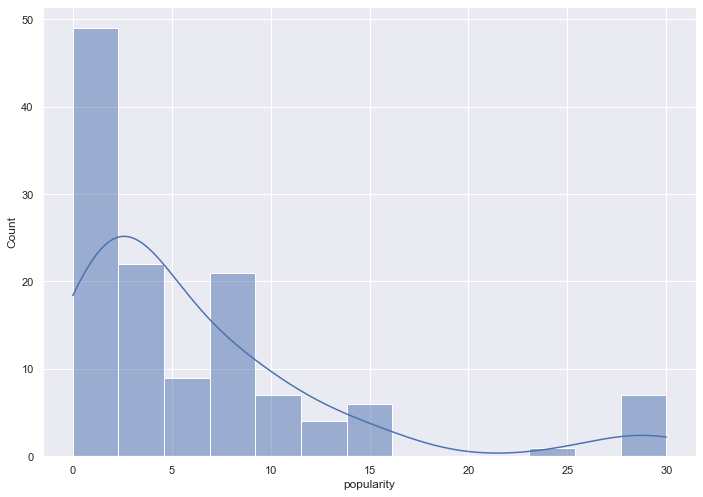

In [246]:
sns.histplot(data=df, x="popularity", kde=True)


## Compare with other datasets

In [247]:
pop_df = pd.read_csv('pop.csv')
pop_df = pop_df[pop_df.main_artist == POP_ARTIST]
pop_df = pop_df.sample(n = min(SAMPLE_SIZE, len(pop_df)))
frames = [df, pop_df]
df = pd.concat(frames)
df.head()

,id,name,main_artist,key,mode,time_signature,duration_ms_x,danceability,loudness,energy,instrumentalness,liveness,valence,speechiness,tempo,popularity,youtube_views,last_fm_playcount,last_fm_listeners
1724,5xZTetXJqKPQp00nwuPWmG,Tal ghyabek ya ghzali,Cheb Hasni,9,1,3,219800,0.733,-3.924,0.799,0.000017,0.1660,0.829,0.0412,135.671,2,168955.0,80,43
952,7GaLynDRlYhLTUoPzWHO6A,داك المحكوم,Cheb Hasni,7,1,3,364893,0.433,-3.859,0.836,0.000109,0.0759,0.892,0.1120,176.900,5,1459.0,115,27
1997,5vATyMKM0gCzU0m3x8tO8X,ماني ماني,Cheb Hasni,8,1,4,337826,0.456,-3.842,0.741,0.000007,0.1230,0.821,0.2990,183.850,1,243746.0,13,10
489,4iHQzOQq0Vb7NpJHpHP4cn,Manakdarche,Cheb Hasni,7,0,3,345720,0.569,-8.841,0.555,0.000130,0.1450,0.962,0.0397,156.875,9,2378938.0,35,14
549,6438uhjVuYGkD8aUHUyju5,Gualou hasni met,Cheb Hasni,1,1,4,396813,0.701,-7.131,0.531,0.000023,0.1210,0.480,0.0274,136.755,8,4484745.0,1745,486


In [248]:
# NORMALIZE BY SINGER & RANDOMLI PICK SAME SIZE OF SONGS (random based on popularity)
pop_columns = ['popularity', 'youtube_views', 'last_fm_playcount']
artists = [POP_ARTIST, RAI_ARTIST]
df[pop_columns].fillna(0)

df[pop_columns] = (df[pop_columns] - df[pop_columns].min()) / (df[pop_columns].max() - df[pop_columns].min())


In [249]:
for artist in artists:
    art_df = df.loc[df.main_artist == artist, : ] 
    art_df.head()
    art_df[pop_columns] = (art_df[pop_columns] - art_df[pop_columns].min()) / (art_df[pop_columns].max() - art_df[pop_columns].min())
    df.loc[df.main_artist == artist, : ] = art_df

/Users/belkacemberchiche/miniforge3/envs/.venv/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<AxesSubplot:xlabel='popularity', ylabel='Count'>

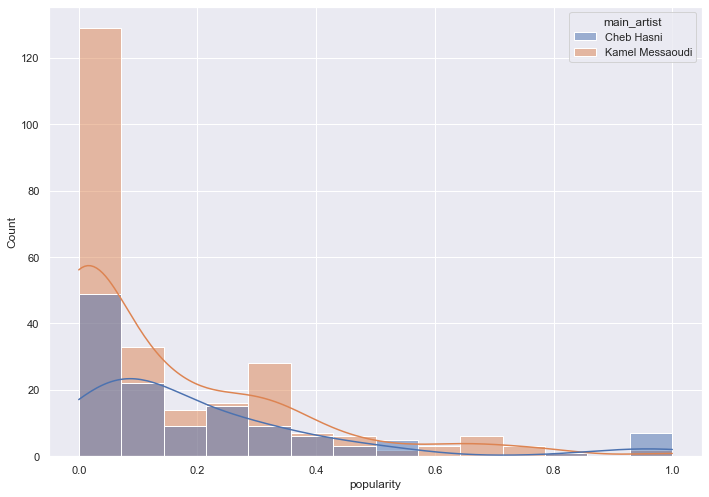

In [250]:

df = df[df.main_artist.isin(artists)]
sns.histplot(data=df, x="popularity", hue='main_artist', kde=True)